In [1]:
# Install required packages if not already present
!pip install seaborn matplotlib scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [2]:
# Load the dataset
df = pd.read_csv("/content/cardio_train (1).csv", sep=';')

# Show first few rows
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# Check missing values
print(df.isnull().sum())

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Check basic info
df.info()

# Feature & target separation
X = df.drop(columns=['cardio'])
y = df['cardio']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(1

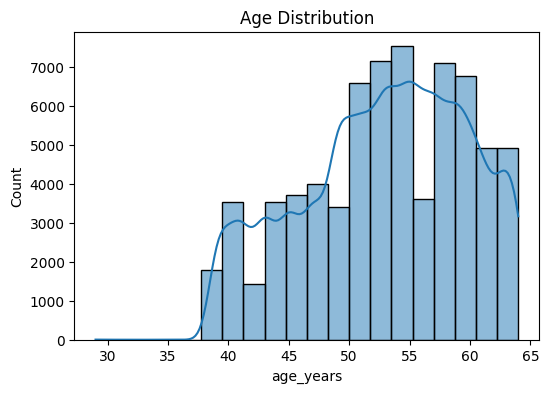

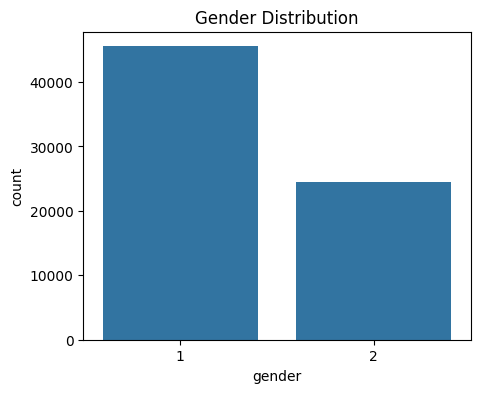

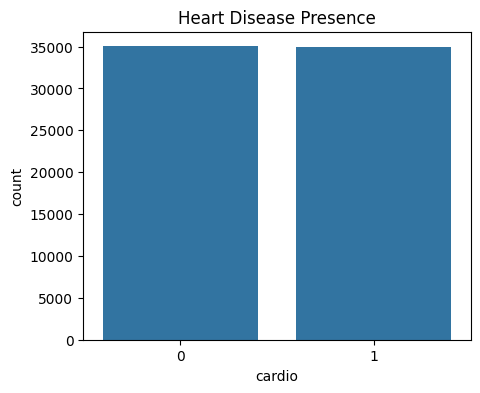

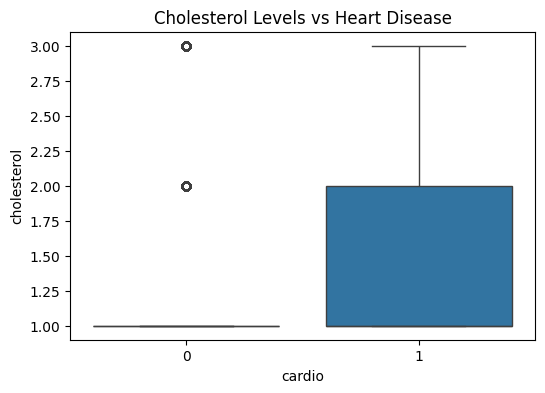

In [4]:
# Age is in days, convert to years for better understanding
df['age_years'] = (df['age'] / 365).astype(int)

# Plot age distribution
plt.figure(figsize=(6,4))
sns.histplot(df['age_years'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# Gender count
plt.figure(figsize=(5,4))
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()

# Target variable distribution
plt.figure(figsize=(5,4))
sns.countplot(x='cardio', data=df)
plt.title("Heart Disease Presence")
plt.show()

# Boxplot for cholesterol vs cardio
plt.figure(figsize=(6,4))
sns.boxplot(x='cardio', y='cholesterol', data=df)
plt.title("Cholesterol Levels vs Heart Disease")
plt.show()


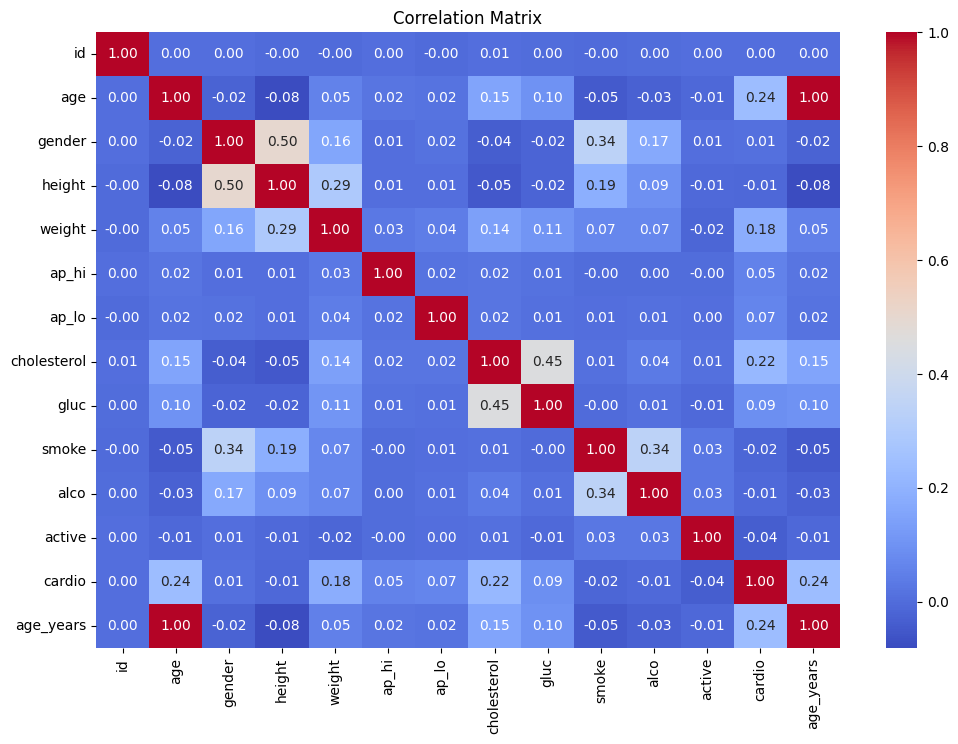

In [5]:
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
models = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# Show comparison
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
results_df


SVM Accuracy: 0.7299
KNN Accuracy: 0.6260
Decision Tree Accuracy: 0.6323
Logistic Regression Accuracy: 0.7233
Random Forest Accuracy: 0.7255


,Model,Accuracy
0,SVM,0.729857
1,KNN,0.626000
2,Decision Tree,0.632286
3,Logistic Regression,0.723286
4,Random Forest,0.725500


Best Model: SVM with Accuracy: 0.7299
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6988
           1       0.75      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



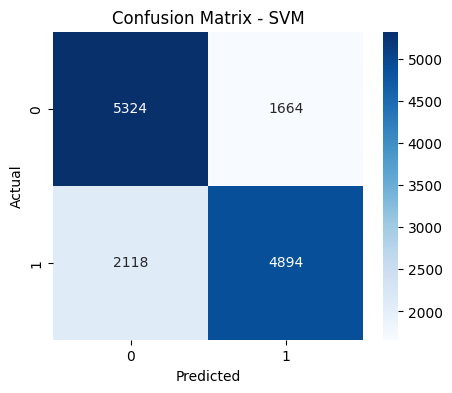

In [8]:
best_model_name = max(results, key=results.get)
print(f"Best Model: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")

final_model = models[best_model_name]
final_model.fit(X_train, y_train)
y_final_pred = final_model.predict(X_test)

# Classification report
print(classification_report(y_test, y_final_pred))

# Confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_final_pred), annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
